# AlexNet MNIST Classification
* Auther: Ziad Tamim
* Description: Training AlexNEt with MNIST Dataset. Loading data, building the AlexNet achetiture using tensorflow, training the model, and evaluating its performance.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


2024-04-30 10:01:04.205365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 10:01:04.205483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 10:01:04.310459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading Training and testing data (MNIST)
* Loading the data using pandas read_csv function
* Normalising pixle values
* Resizing image to fit the model input [32 x 32]

In [2]:
# Load the training and test data from CSV files
train_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

# Assuming the first column is 'label' and the rest are pixel values
y_train = train_df['label'].values
x_train = train_df.drop(['label'], axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values
y_test = test_df['label'].values
x_test = test_df.drop(['label'], axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values

# Convert to 3 channels by repeating the grayscale data across three channels
x_train = np.repeat(x_train, 3, axis=3)
x_test = np.repeat(x_test, 3, axis=3)

# Resize images to 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])


## Building the AlexNet architechture using tensorflow

In [3]:
def build_alexnet(input_shape=(32, 32, 3)):
    model = models.Sequential([
        # 1st Conv Layer
        layers.Conv2D(filters=48, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=2, strides=2),
        
        # 2nd Conv Layer
        layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=2, strides=2),
        
        # 3rd Conv Layer
        layers.Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'),
        
        # 4th Conv Layer
        layers.Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'),
        
        # 5th Conv Layer
        layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=2, strides=2),

        # Flattening followed by 3 Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the AlexNet model
model = build_alexnet()
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 48)     │         3,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        55,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 192)      │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426,634 (5.44 MB)

 Trainable params: 1,426,634 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model
* 15 epochs
* 64 batch size

In [4]:
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
 16/938 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1024 - loss: 2.3062 

I0000 00:00:1714471293.854042     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714471293.873937     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7810 - loss: 0.6264

W0000 00:00:1714471305.633152     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714471306.552541     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7811 - loss: 0.6260 - val_accuracy: 0.9802 - val_loss: 0.0666
Epoch 2/15
 17/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9792 - loss: 0.0773

W0000 00:00:1714471308.217890     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9787 - loss: 0.0820 - val_accuracy: 0.9891 - val_loss: 0.0386
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9870 - loss: 0.0531 - val_accuracy: 0.9907 - val_loss: 0.0346
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9880 - loss: 0.0445 - val_accuracy: 0.9924 - val_loss: 0.0252
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9911 - loss: 0.0360 - val_accuracy: 0.9932 - val_loss: 0.0224
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9907 - loss: 0.0357 - val_accuracy: 0.9931 - val_loss: 0.0290
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9929 - loss: 0.0279 - val_accuracy: 0.9929 - val_loss: 0.0276
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9936 - loss: 0.0255 - val_accuracy: 0.9923 - val_loss: 0.0228
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9936 - loss: 0.0239 - val_accuracy: 0.9927 - val_

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


 76/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0499

W0000 00:00:1714471406.615609     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0574
Test accuracy: 0.9919000267982483


## Visualising Training Accuracy and Loss

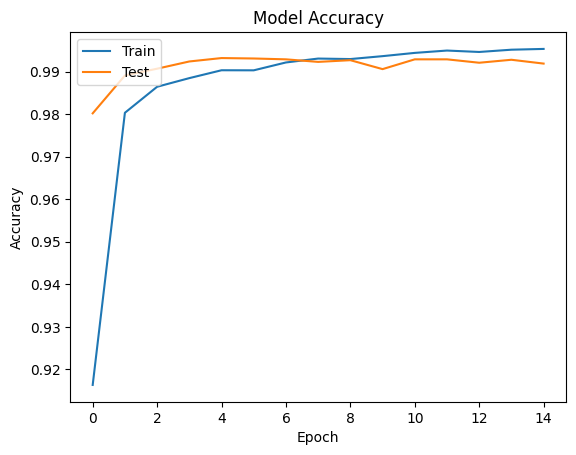

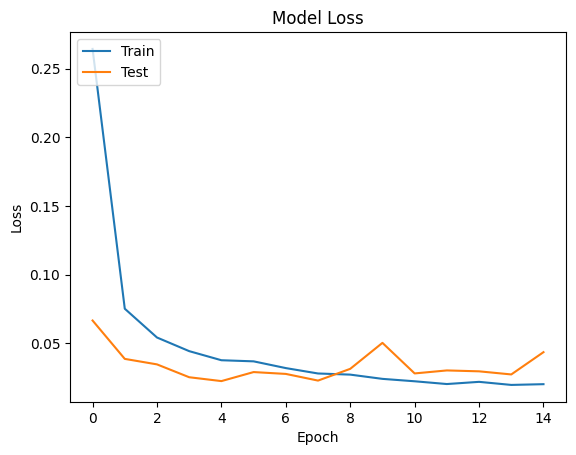

In [6]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Evaluaing the model using confusion matrix and classification report

 98/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1714471408.818525     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1714471409.755037     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


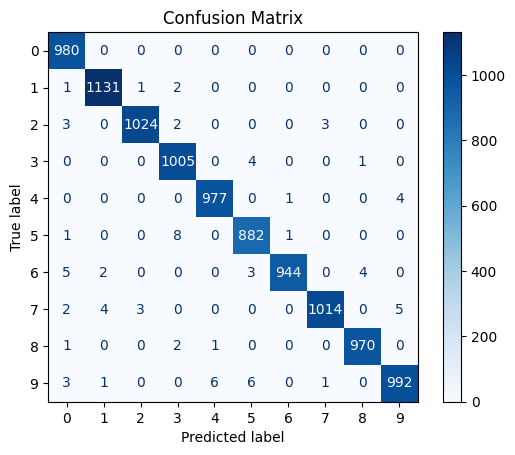

Classification Report:
               precision    recall  f1-score   support

           0     0.9839    1.0000    0.9919       980
           1     0.9938    0.9965    0.9952      1135
           2     0.9961    0.9922    0.9942      1032
           3     0.9863    0.9950    0.9906      1010
           4     0.9929    0.9949    0.9939       982
           5     0.9855    0.9888    0.9871       892
           6     0.9979    0.9854    0.9916       958
           7     0.9961    0.9864    0.9912      1028
           8     0.9949    0.9959    0.9954       974
           9     0.9910    0.9832    0.9871      1009

    accuracy                         0.9919     10000
   macro avg     0.9918    0.9918    0.9918     10000
weighted avg     0.9919    0.9919    0.9919     10000



In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Predictions for the test set
prediction_scores = model.predict(x_test)
predicted_labels = np.argmax(prediction_scores, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, predicted_labels, digits=4)
print('Classification Report:\n', report)


## Predicting an image lable from the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


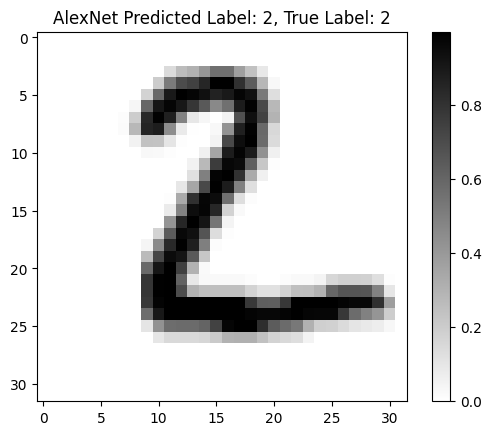

In [8]:
# Inference on a single image
img_index = 1
selected_image = x_test[img_index]
selected_label = y_test[img_index]
image_for_inference = np.expand_dims(selected_image, 0)
predictions = model.predict(image_for_inference)
predicted_label = np.argmax(predictions)

# Display the image
plt.figure()
plt.imshow(selected_image[:, :, 0], cmap=plt.cm.binary)
plt.title(f'AlexNet Predicted Label: {predicted_label}, True Label: {selected_label}')
plt.colorbar()
plt.grid(False)
plt.show()